In [1]:
from tw_functions import autenticar, get_tweets
import indicoio
import numpy as np
import pandas as pd
import seaborn as sns
import collections
import re
import matplotlib.pyplot as plt
from stop_words import get_stop_words
from wordcloud import WordCloud
import tweepy

In [2]:
candidatos = ["AlfredoRamosM", "QuinteroCalle", "jcvelezuribe","JDValde", "BeatrizRave","VictorJCorreaV"]

In [3]:
stopwords = get_stop_words('es')
lista_propia = ["medellín", "campaña", "ser", "vamos", "quinterocalle", "unvotomàsporquintero"]
for palabra in lista_propia:
    stopwords.append(palabra)

In [4]:
num_tweets = []
all_candidates = []
for candidato in candidatos:
    with open(f'tweets/{candidato}.txt', 'r') as f:
        tweets = f.readlines()
        all_text = " ".join(tweets)
        
    wordcount = collections.defaultdict(int)
    for word in all_text.lower().split():

        if word not in stopwords:
            wordcount[word] += 1

    all_candidates.append(wordcount)
    num_tweets.append(len(tweets))

In [5]:
num_tweets

[3219, 1501, 1462, 1627, 2098, 1489]

In [6]:
def veces(palabra):
    dic_pal = {}
    for i, candidato in enumerate(all_candidates):
        dic_pal[candidatos[i]] = 100 * candidato[palabra]/num_tweets[i]
    return dic_pal  

In [7]:
def plot_palabra(palabra):
    dict_palabra = veces(palabra)
    plt.style.use('ggplot')
    sns.set_context("talk")
    serie = pd.Series(dict_palabra)
    sns.barplot(serie.values, serie.index, orient="h")
    plt.title(palabra)
    plt.savefig(f'imagenes/{palabra}.png', bbox_inches='tight')
    plt.show()

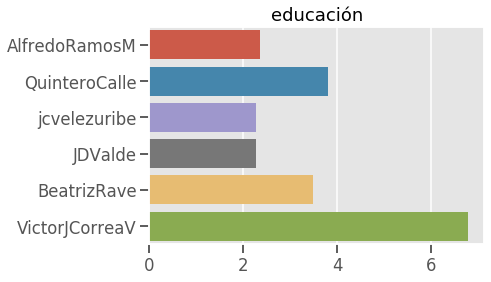

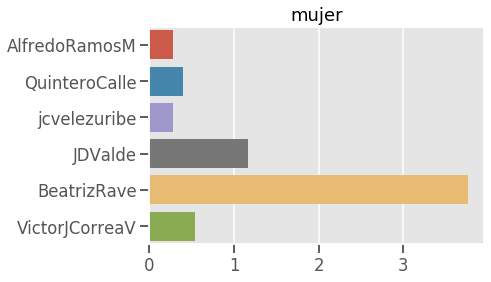

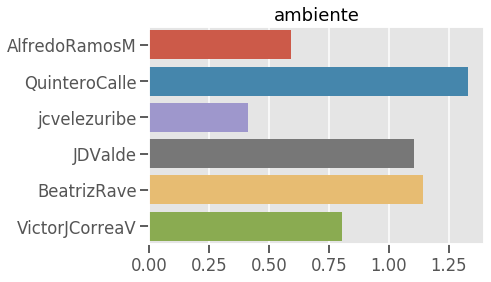

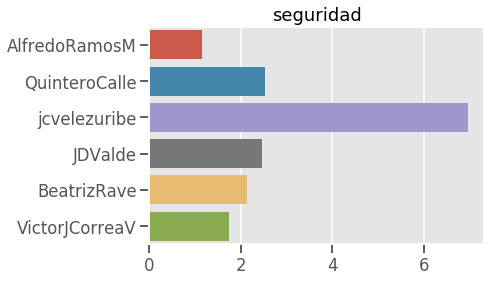

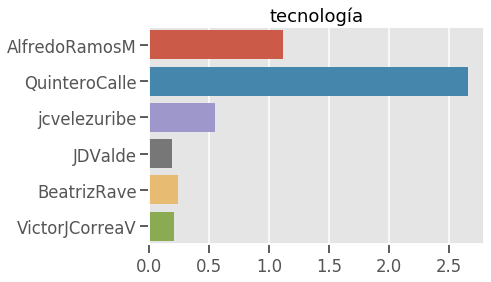

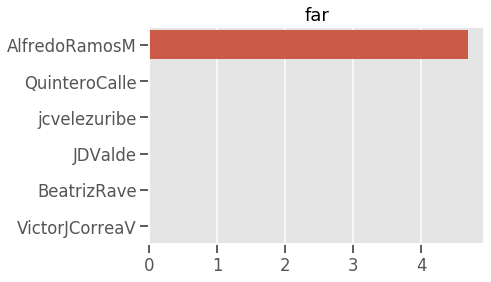

In [9]:
plot_palabra("educación")
plot_palabra("mujer")
plot_palabra("ambiente")
plot_palabra("seguridad")
plot_palabra("tecnología")
plot_palabra("far")